In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.metrics import mean_squared_error, r2_score

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, OneHotEncoder

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor, StackingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
import lightgbm as lgb

In [2]:
train_df = pd.read_csv('/kaggle/input/actualbowlers/Arjun_Bowlers_dataset - Sheet1 (3).csv')

In [3]:
print(train_df)

          athlete_name  run_up_speed  impulse_stride_length  is_contact_time  \
0                 HD 1          25.0                  162.0            142.0   
1                 HD 2          29.0                  256.0            154.0   
2                 HD 3          28.0                  228.0            142.0   
3                 HD 4          22.0                  167.0            175.0   
4                 HD 5          28.0                  143.0            146.0   
..                 ...           ...                    ...              ...   
175     Odran Williams          20.0                  166.0            208.0   
176       Oscar Knight          21.0                  162.0            163.0   
177      Riya Srinivas          21.0                  215.0            188.0   
178      Sankalp Patil          22.0                  163.0            171.0   
179  Vincent Whitehead          22.0                  247.0            188.0   

     com_disp  bfc_contact_time  front_

In [4]:
train_df.columns

Index(['athlete_name', 'run_up_speed', 'impulse_stride_length',
       'is_contact_time', 'com_disp', 'bfc_contact_time', 'front_knee_flexion',
       'trunk_flexion', 'arm_speed', 'ffc_contact_time',
       'delivery_stride_length', 'is_flight_time', 'Bowling Speed (Kmph)'],
      dtype='object')

In [5]:
train_df.describe()

,run_up_speed,impulse_stride_length,is_contact_time,com_disp,bfc_contact_time,front_knee_flexion,trunk_flexion,arm_speed,ffc_contact_time,delivery_stride_length,is_flight_time,Bowling Speed (Kmph)
count,175.000000,175.000000,174.000000,175.000000,175.000000,180.000000,180.000000,174.000000,173.000000,176.000000,175.000000,174.000000
mean,21.851429,186.651429,167.798851,13.462857,224.131429,16.727778,33.522222,262.563218,419.115607,113.863636,229.920000,102.362069
std,3.612031,45.856832,23.442459,5.587089,45.378990,19.383755,10.700836,31.311303,83.640555,17.709840,55.491787,16.577405
min,13.000000,39.000000,121.000000,3.000000,142.000000,-20.000000,0.000000,169.000000,246.000000,67.000000,79.000000,52.000000
25%,19.000000,153.500000,150.000000,9.000000,188.000000,-0.250000,28.000000,245.000000,363.000000,103.000000,192.000000,90.000000
50%,22.000000,179.000000,163.000000,13.000000,221.000000,16.000000,34.000000,263.500000,420.000000,115.500000,233.000000,102.000000
75%,24.000000,214.500000,179.000000,16.500000,246.000000,34.000000,40.000000,284.500000,468.000000,126.000000,263.000000,116.000000
max,31.000000,315.000000,267.000000,31.000000,430.000000,58.000000,63.000000,335.000000,747.000000,157.000000,354.000000,142.000000


In [6]:
train_df.dtypes[train_df.dtypes != 'object']

run_up_speed              float64
impulse_stride_length     float64
is_contact_time           float64
com_disp                  float64
bfc_contact_time          float64
front_knee_flexion          int64
trunk_flexion               int64
arm_speed                 float64
ffc_contact_time          float64
delivery_stride_length    float64
is_flight_time            float64
Bowling Speed (Kmph)      float64
dtype: object

# **FINDING OUTLIERS:**

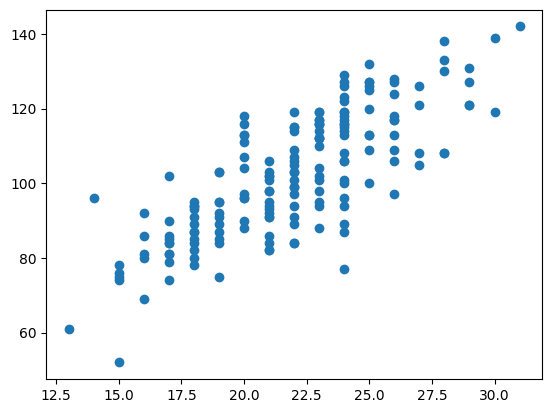

In [7]:
plt.scatter(x='run_up_speed', y='Bowling Speed (Kmph)', data=train_df)

In [8]:
train_df.query('run_up_speed <22.5')
#UK Group 1 Bowler 2

,athlete_name,run_up_speed,impulse_stride_length,is_contact_time,com_disp,bfc_contact_time,front_knee_flexion,trunk_flexion,arm_speed,ffc_contact_time,delivery_stride_length,is_flight_time,Bowling Speed (Kmph)
3,HD 4,22.0,167.0,175.0,27.0,267.0,8,32,245.0,470.0,109.0,250.0,94.0
12,HD 13,22.0,160.0,212.0,14.0,200.0,34,28,220.0,342.0,105.0,200.0,89.0
13,HD 14,20.0,160.0,242.0,19.0,317.0,-10,37,249.0,580.0,102.0,171.0,96.0
18,HD 18,19.0,175.0,220.0,23.0,340.0,33,14,228.0,325.0,108.0,196.0,87.0
19,HD 19,22.0,260.0,192.0,26.0,242.0,19,31,262.0,450.0,121.0,300.0,119.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,Odran Williams,20.0,166.0,208.0,8.0,279.0,-7,33,258.0,450.0,138.0,192.0,107.0
176,Oscar Knight,21.0,162.0,163.0,9.0,267.0,37,35,262.0,417.0,118.0,242.0,95.0
177,Riya Srinivas,21.0,215.0,188.0,11.0,204.0,25,24,264.0,313.0,116.0,263.0,91.0
178,Sankalp Patil,22.0,163.0,171.0,12.0,258.0,-20,37,260.0,433.0,97.0,167.0,99.0


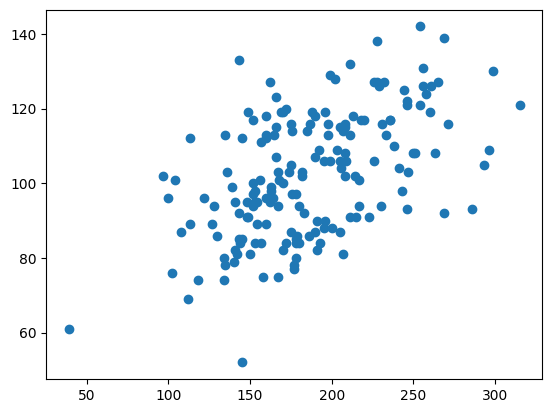

In [9]:
plt.scatter(x='impulse_stride_length', y='Bowling Speed (Kmph)', data=train_df)

In [10]:
train_df.query('impulse_stride_length < 50')
#London Academy: Bowler 26

,athlete_name,run_up_speed,impulse_stride_length,is_contact_time,com_disp,bfc_contact_time,front_knee_flexion,trunk_flexion,arm_speed,ffc_contact_time,delivery_stride_length,is_flight_time,Bowling Speed (Kmph)
78,London Academy: Bowler 26,13.0,39.0,208.0,3.0,328.0,1,8,198.0,517.0,67.0,86.0,61.0


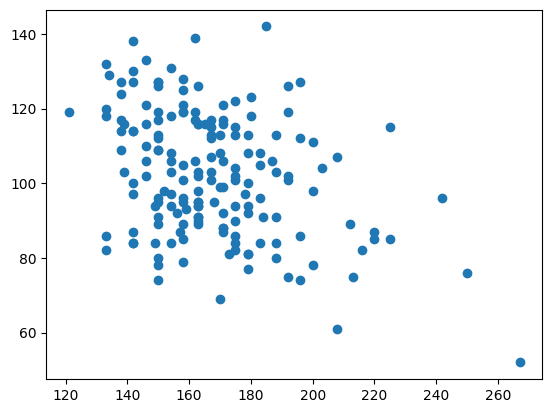

In [11]:
plt.scatter(x='is_contact_time', y='Bowling Speed (Kmph)', data=train_df)

In [12]:
train_df.query('is_contact_time > 180')
# London Academy: Bowler 53
# Non HD 1


,athlete_name,run_up_speed,impulse_stride_length,is_contact_time,com_disp,bfc_contact_time,front_knee_flexion,trunk_flexion,arm_speed,ffc_contact_time,delivery_stride_length,is_flight_time,Bowling Speed (Kmph)
5,HD 6,29.0,232.0,196.0,16.0,242.0,41,31,266.0,396.0,148.0,217.0,127.0
12,HD 13,22.0,160.0,212.0,14.0,200.0,34,28,220.0,342.0,105.0,200.0,89.0
13,HD 14,20.0,160.0,242.0,19.0,317.0,-10,37,249.0,580.0,102.0,171.0,96.0
14,HD 15,23.0,113.0,196.0,8.0,325.0,14,39,267.0,462.0,130.0,100.0,112.0
15,Non HD 1,31.0,254.0,185.0,13.0,225.0,11,31,290.0,458.0,138.0,283.0,142.0
18,HD 18,19.0,175.0,220.0,23.0,340.0,33,14,228.0,325.0,108.0,196.0,87.0
19,HD 19,22.0,260.0,192.0,26.0,242.0,19,31,262.0,450.0,121.0,300.0,119.0
24,HD 24,26.0,209.0,187.0,22.0,217.0,12,48,214.0,425.0,135.0,220.0,106.0
29,UK Group 1 Bowler 2,15.0,145.0,267.0,7.0,430.0,-8,63,187.0,747.0,115.0,79.0,52.0
31,UK Group 1 Bowler 4,21.0,178.0,183.0,18.0,220.0,46,34,275.0,470.0,108.0,279.0,84.0


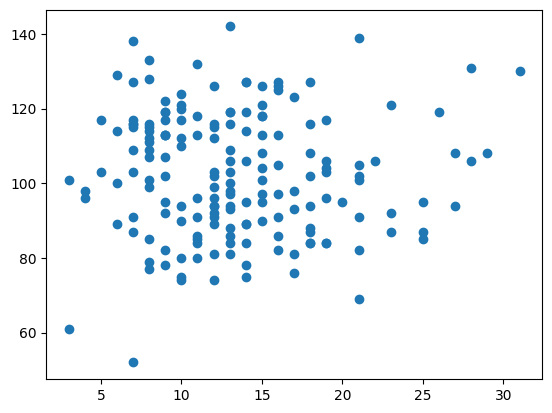

In [13]:
plt.scatter(x='com_disp', y='Bowling Speed (Kmph)', data=train_df)

In [14]:
train_df.query('com_disp > 11 & com_disp < 14')

,athlete_name,run_up_speed,impulse_stride_length,is_contact_time,com_disp,bfc_contact_time,front_knee_flexion,trunk_flexion,arm_speed,ffc_contact_time,delivery_stride_length,is_flight_time,Bowling Speed (Kmph)
7,HD 8,30.0,149.0,121.0,13.0,192.0,35,47,324.0,292.0,135.0,125.0,119.0
11,HD 12,24.0,170.0,179.0,13.0,200.0,38,33,262.0,362.0,145.0,225.0,100.0
15,Non HD 1,31.0,254.0,185.0,13.0,225.0,11,31,290.0,458.0,138.0,283.0,142.0
17,HD 17,23.0,145.0,150.0,12.0,246.0,-5,49,323.0,512.0,124.0,167.0,112.0
21,HD 21,24.0,217.0,154.0,13.0,242.0,2,48,232.0,500.0,128.0,225.0,94.0
23,HD 23,22.0,176.0,154.0,13.0,154.0,27,40,250.0,450.0,113.0,237.0,97.0
51,Christiaan,23.0,196.0,150.0,13.0,261.0,2,36,299.0,495.0,125.0,213.0,119.0
55,London Academy: Bowler 3,19.0,183.0,179.0,12.0,217.0,-7,29,229.0,433.0,101.0,254.0,92.0
61,London Academy: Bowler 9,18.0,246.0,NaN,13.0,233.0,18,44,230.0,472.0,110.0,316.0,93.0
62,London Academy: Bowler 10,17.0,142.0,179.0,13.0,216.0,32,30,264.0,402.0,93.0,213.0,81.0


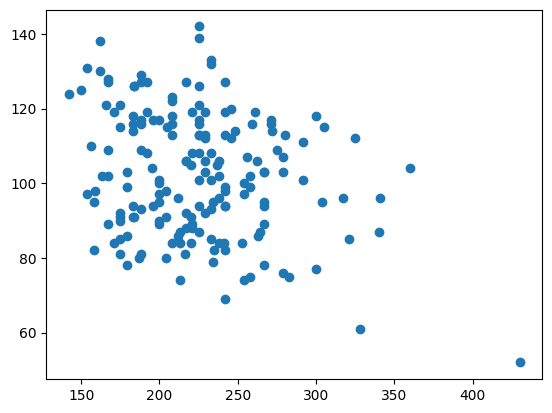

In [15]:
plt.scatter(x='bfc_contact_time', y='Bowling Speed (Kmph)', data=train_df)

In [16]:
train_df.query('bfc_contact_time > 300 & bfc_contact_time < 350')

,athlete_name,run_up_speed,impulse_stride_length,is_contact_time,com_disp,bfc_contact_time,front_knee_flexion,trunk_flexion,arm_speed,ffc_contact_time,delivery_stride_length,is_flight_time,Bowling Speed (Kmph)
13,HD 14,20.0,160.0,242.0,19.0,317.0,-10,37,249.0,580.0,102.0,171.0,96.0
14,HD 15,23.0,113.0,196.0,8.0,325.0,14,39,267.0,462.0,130.0,100.0,112.0
18,HD 18,19.0,175.0,220.0,23.0,340.0,33,14,228.0,325.0,108.0,196.0,87.0
36,UK Group 2 Bowler 2,17.0,145.0,225.0,25.0,321.0,-6,49,245.0,667.0,97.0,229.0,85.0
64,London Academy: Bowler 12,18.0,154.0,158.0,15.0,304.0,-8,27,277.0,615.0,81.0,242.0,95.0
78,London Academy: Bowler 26,13.0,39.0,208.0,3.0,328.0,1,8,198.0,517.0,67.0,86.0,61.0
116,London Academy: Bowler 64,14.0,100.0,158.0,4.0,341.0,-14,37,282.0,484.0,101.0,113.0,96.0
168,Aadyanath,22.0,208.0,225.0,8.0,305.0,-3,45,229.0,575.0,157.0,154.0,115.0


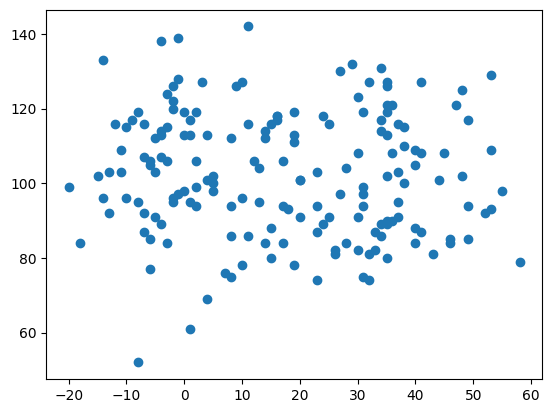

In [17]:
plt.scatter(x='front_knee_flexion', y='Bowling Speed (Kmph)', data=train_df)

In [18]:
train_df.query('front_knee_flexion >-15 & front_knee_flexion<5')
#HD 3, HD 11


,athlete_name,run_up_speed,impulse_stride_length,is_contact_time,com_disp,bfc_contact_time,front_knee_flexion,trunk_flexion,arm_speed,ffc_contact_time,delivery_stride_length,is_flight_time,Bowling Speed (Kmph)
0,HD 1,25.0,162.0,142.0,7.0,217.0,3,41,263.0,467.0,127.0,196.0,127.0
2,HD 3,28.0,228.0,142.0,7.0,162.0,-4,47,335.0,317.0,129.0,279.0,138.0
4,HD 5,28.0,143.0,146.0,8.0,233.0,-14,40,285.0,362.0,146.0,163.0,133.0
10,HD 11,30.0,269.0,162.0,21.0,225.0,-1,44,275.0,417.0,139.0,254.0,139.0
13,HD 14,20.0,160.0,242.0,19.0,317.0,-10,37,249.0,580.0,102.0,171.0,96.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,Ishaan Patel,24.0,152.0,138.0,5.0,271.0,-9,31,253.0,333.0,131.0,125.0,117.0
172,Kajus Syed,20.0,135.0,150.0,9.0,242.0,-4,42,309.0,333.0,111.0,159.0,113.0
173,Keiran Catherell,23.0,198.0,163.0,8.0,271.0,-12,29,276.0,496.0,122.0,200.0,116.0
174,Ned Ballantyne,16.0,143.0,171.0,9.0,229.0,-13,40,254.0,383.0,102.0,179.0,92.0


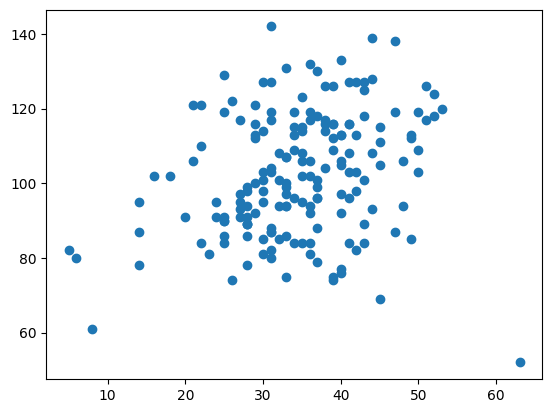

In [19]:
plt.scatter(x='trunk_flexion', y='Bowling Speed (Kmph)', data=train_df)

In [20]:
train_df.query('trunk_flexion < 10')
#London Academy: Bowler 8, London Academy: Bowler 36

,athlete_name,run_up_speed,impulse_stride_length,is_contact_time,com_disp,bfc_contact_time,front_knee_flexion,trunk_flexion,arm_speed,ffc_contact_time,delivery_stride_length,is_flight_time,Bowling Speed (Kmph)
53,London Academy: Bowler 1,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN
60,London Academy: Bowler 8,18.0,178.0,150.0,11.0,187.0,15,6,214.0,288.0,81.0,241.0,80.0
78,London Academy: Bowler 26,13.0,39.0,208.0,3.0,328.0,1,8,198.0,517.0,67.0,86.0,61.0
80,London Academy: Bowler 28,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN
81,London Academy: Bowler 29,18.0,177.0,188.0,22.0,192.0,0,0,NaN,NaN,82.0,291.0,NaN
85,London Academy: Bowler 33,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN
88,London Academy: Bowler 36,18.0,141.0,133.0,16.0,158.0,33,5,211.0,336.0,78.0,229.0,82.0
96,London Academy: Bowler 44,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,NaN,NaN


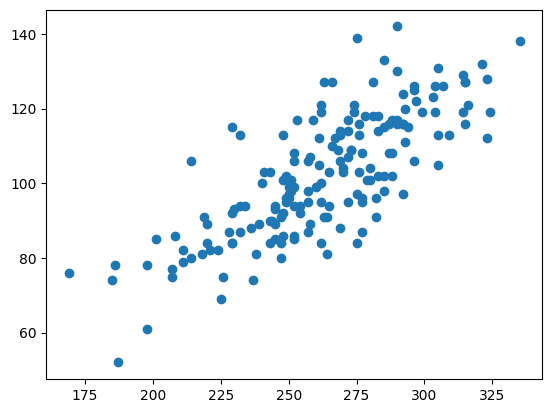

In [21]:
plt.scatter(x='arm_speed', y='Bowling Speed (Kmph)', data=train_df)

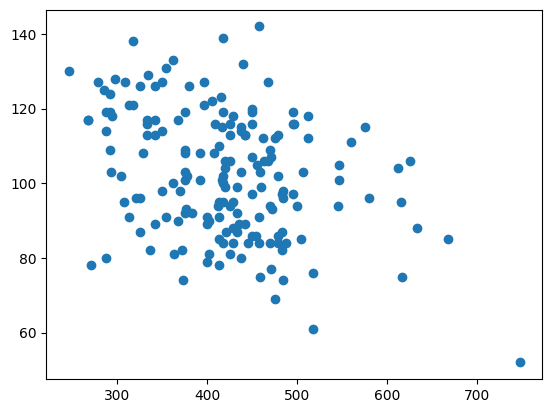

In [22]:
plt.scatter(x='ffc_contact_time', y='Bowling Speed (Kmph)', data=train_df)

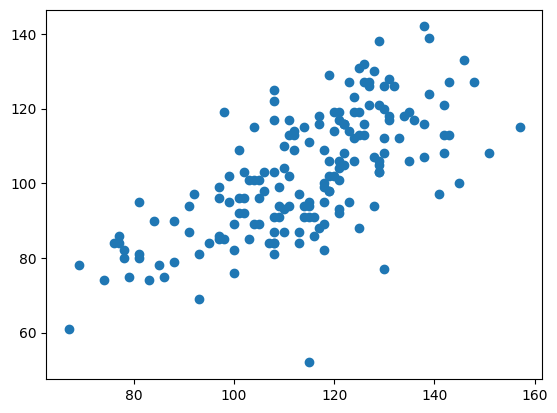

In [23]:
plt.scatter(x='delivery_stride_length', y='Bowling Speed (Kmph)', data=train_df)

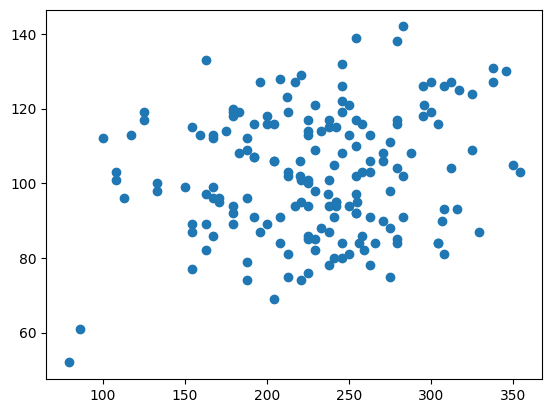

In [24]:
plt.scatter(x='is_flight_time', y='Bowling Speed (Kmph)', data=train_df)

# **REMOVING NULL VALUES AND OUTLIERS**

In [25]:
values = ['UK Group 1 Bowler 2', 'London Academy: Bowler 26', 'London Academy: Bowler 53',
'Non HD 1', 'HD 3', 'HD 11', 'London Academy: Bowler 8', 'London Academy: Bowler 36']

In [26]:
train_df = train_df[train_df.athlete_name.isin(values) == False]

In [27]:
pd.DataFrame(train_df.isnull().sum().sort_values(ascending=False)).head(20)
train_df = train_df.dropna()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Bowling Speed (Kmph)', ylabel='Count'>

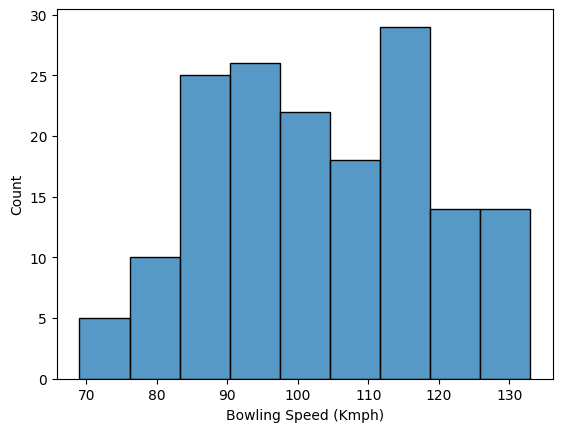

In [28]:
sns.histplot(
    train_df,
    x=train_df['Bowling Speed (Kmph)']
)

In [29]:
train_df['Bowling Speed (Kmph)'] = np.log1p(train_df['Bowling Speed (Kmph)'])


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Bowling Speed (Kmph)', ylabel='Count'>

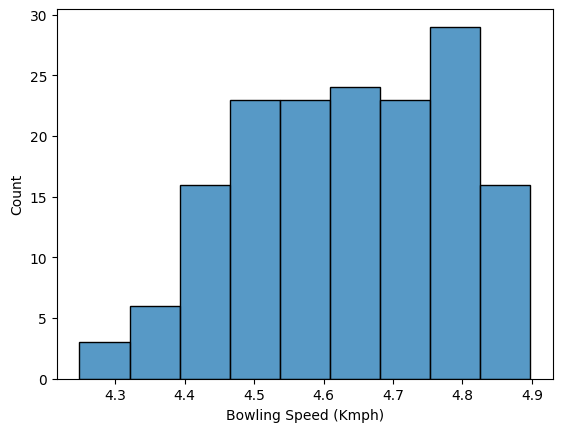

In [30]:
sns.histplot(
    train_df,
    x=train_df['Bowling Speed (Kmph)']
)


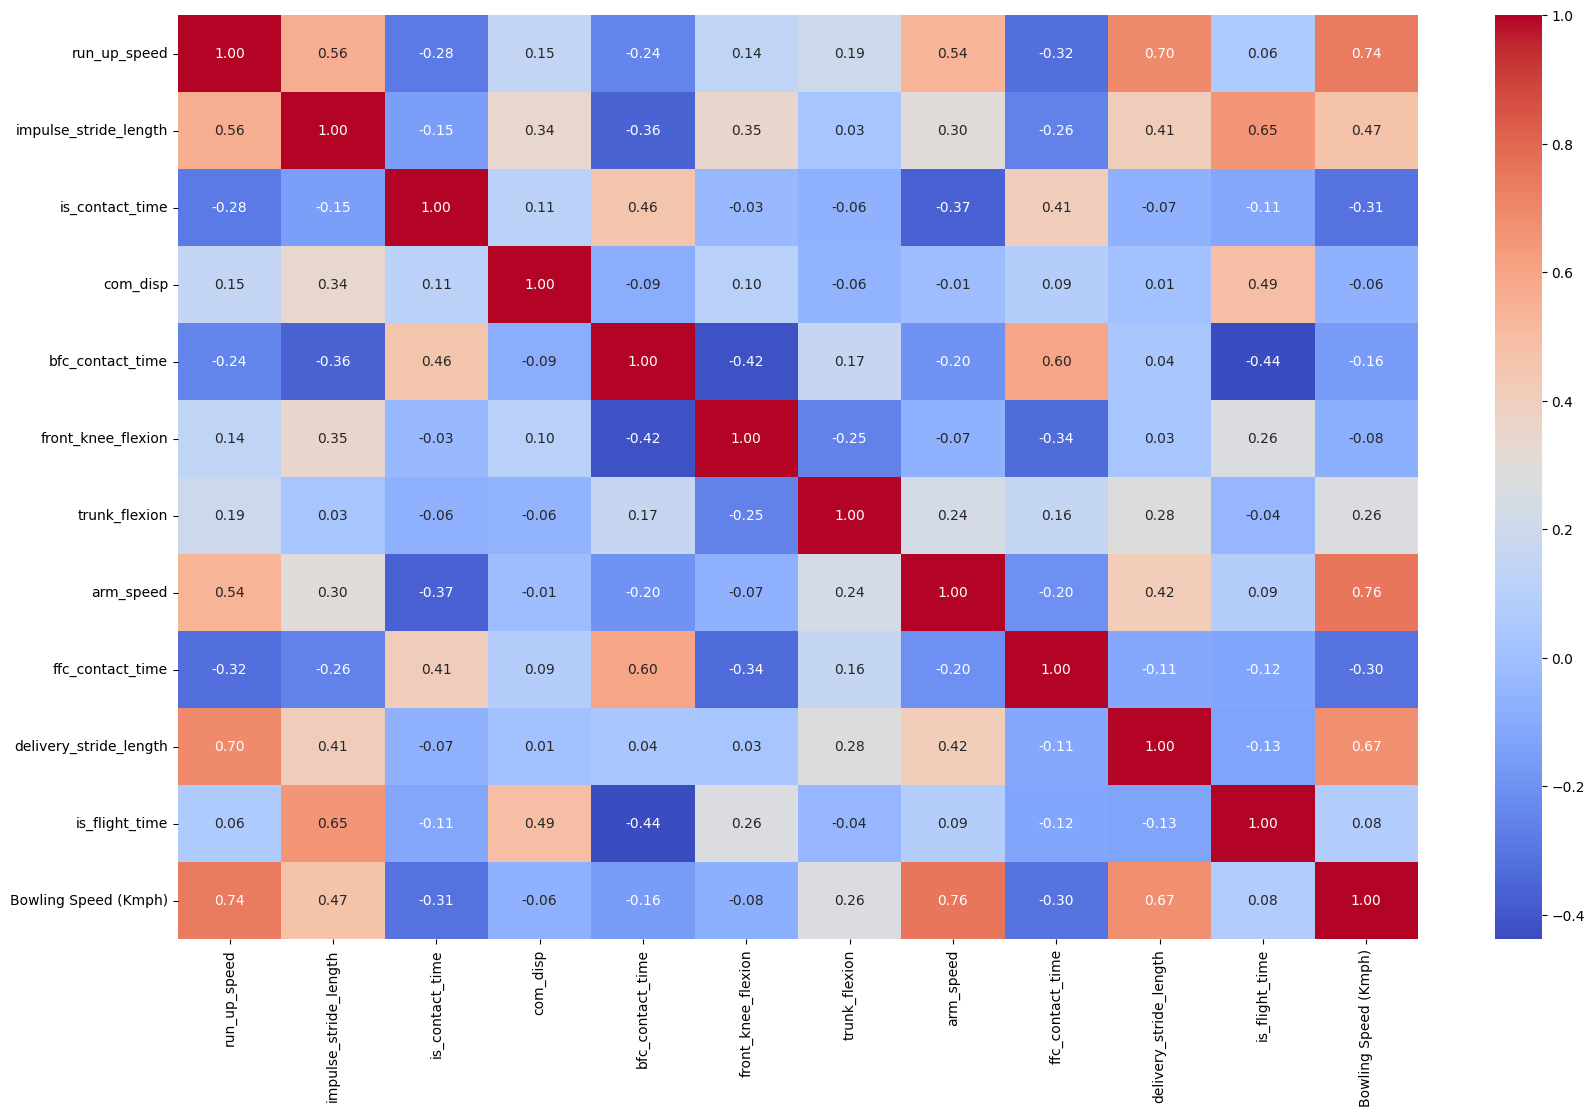

In [31]:
correlation_matrix = train_df.corr(numeric_only=True)
plt.figure(figsize=(20,12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
train_df = train_df.drop(columns = 'athlete_name')

In [32]:
train_df.to_csv('submission.csv', index=False)

# **BUILDING MODELS**

In [32]:
X = train_df.drop(columns=['Bowling Speed (Kmph)'])
y = train_df['Bowling Speed (Kmph)'] 

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((130, 11), (33, 11), (130,), (33,))

In [35]:
#LINEAR REGRESSION MODEL
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [36]:
y_pred_lr = lr.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred_lr))

0.07929179628145665

In [37]:
r2_score(y_test, y_pred_lr)

0.7123206408660285

In [38]:
intercept_lr = lr.intercept_
coefficients_lr = lr.coef_
equation_lr = f"y = {intercept_lr:.3f}" 
for feature, coef in zip(X_train.columns, coefficients_lr):
    equation_lr += f" + ({coef:.3f})*{feature}"

print("\nLinear Regression Equation:")
print(equation_lr)
feature_importances = abs(coefficients_lr) / abs(coefficients_lr).sum()
feature_importances_lr = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': coefficients_lr,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Print feature importances
print("Feature Importances (LR):")
print(feature_importances_lr)


Linear Regression Equation:
y = 3.461 + (0.015)*run_up_speed + (0.000)*impulse_stride_length + (0.000)*is_contact_time + (-0.006)*com_disp + (0.000)*bfc_contact_time + (-0.001)*front_knee_flexion + (0.000)*trunk_flexion + (0.002)*arm_speed + (-0.000)*ffc_contact_time + (0.002)*delivery_stride_length + (0.001)*is_flight_time
Feature Importances (LR):
                   Feature  Coefficient  Importance
0             run_up_speed     0.015479    0.544747
3                 com_disp    -0.005587    0.196611
9   delivery_stride_length     0.002225    0.078302
7                arm_speed     0.001978    0.069605
5       front_knee_flexion    -0.001253    0.044083
10          is_flight_time     0.000610    0.021464
6            trunk_flexion     0.000379    0.013324
8         ffc_contact_time    -0.000294    0.010360
4         bfc_contact_time     0.000292    0.010288
2          is_contact_time     0.000228    0.008016
1    impulse_stride_length     0.000091    0.003199


In [39]:
#Random Forest Regressor
RFR = RandomForestRegressor(random_state=13)
param_grid_RFR = {
    'max_depth': [7, 14, 21],
    'n_estimators': [120, 270, 520],
    'min_samples_split': [3, 5, 10]
}

In [40]:
rfr_cv = GridSearchCV(RFR, param_grid_RFR, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
rfr_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=13), n_jobs=-1,
             param_grid={'max_depth': [7, 14, 21],
                         'min_samples_split': [3, 5, 10],
                         'n_estimators': [120, 270, 520]},
             scoring='neg_mean_squared_error')

In [41]:
y_pred_rfr = rfr_cv.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred_rfr))

0.09314766149467063

In [42]:
r2_score(y_test, y_pred_rfr)

0.6029948851424121

In [43]:
best_rfr = rfr_cv.best_estimator_
importances_rfr = best_rfr.feature_importances_

# Normalize importances to approximate coefficients
coefficients_rfr = importances_rfr / importances_rfr.sum()

# Generate the approximate equation
features = X_train.columns  # Feature names (assuming X_train is a DataFrame)
equation_rfr = "y ≈ "  # Start the approximate equation

for feature, coef in zip(features, coefficients_rfr):
    equation_rfr += f"({coef:.3f})*{feature} + "

# Remove trailing '+'
equation_rfr = equation_rfr[:-3]

print("Approximate Random Forest Regression Equation:")
print(equation_rfr)

Approximate Random Forest Regression Equation:
y ≈ (0.214)*run_up_speed + (0.033)*impulse_stride_length + (0.014)*is_contact_time + (0.016)*com_disp + (0.016)*bfc_contact_time + (0.016)*front_knee_flexion + (0.016)*trunk_flexion + (0.476)*arm_speed + (0.030)*ffc_contact_time + (0.151)*delivery_stride_length + (0.018)*is_flight_time


In [44]:
#XGB Regressor
XGB = XGBRegressor(random_state=13)
param_grid_XGB = {
    'learning_rate': [0.05, 0.1, 0.2],
    'n_estimators': [230], #between 220 and 230
    'max_depth': [4], #4 is good
    'min_child_weight': [1,2,3], # matters whether you remove some of the elements
    'gamma': [0,1,2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
}
xgb_cv = GridSearchCV(XGB, param_grid_XGB, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

In [45]:
xgb_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=13, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 0.9, 1.0],
                         'gamma': [0, 1, 2], 'learning_rate': [0.05, 0.1, 0.2],
                         'max_depth': [4], 'min_child_weight': [1, 2, 3],
                         'n_estimators': [230], 'subsample': [0.8, 0.9, 1.0]},
             scoring='neg_mean_squared_error')

In [46]:
y_pred_xgb = xgb_cv.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred_xgb))

0.08881841463306206

In [47]:
best_xgb = xgb_cv.best_estimator_
importances_xgb = best_xgb.feature_importances_

# Normalize importances to approximate coefficients
coefficients_xgb = importances_xgb / importances_xgb.sum()

# Generate the approximate equation
features = X_train.columns  # Feature names (assuming X_train is a DataFrame)
equation_xgb = "y ≈ "  # Start the approximate equation

for feature, coef in zip(features, coefficients_xgb):
    equation_xgb += f"({coef:.3f})*{feature} + "

# Remove trailing '+'
equation_xgb = equation_xgb[:-3]

print("Approximate XGB Regression Equation:")
print(equation_xgb)

Approximate XGB Regression Equation:
y ≈ (0.311)*run_up_speed + (0.040)*impulse_stride_length + (0.029)*is_contact_time + (0.037)*com_disp + (0.016)*bfc_contact_time + (0.032)*front_knee_flexion + (0.021)*trunk_flexion + (0.309)*arm_speed + (0.039)*ffc_contact_time + (0.150)*delivery_stride_length + (0.015)*is_flight_time


In [48]:
r2_score(y_test, y_pred_xgb)

0.6390407101942326

In [86]:
correlations = X_train.corrwith(y_train)

# Adjust coefficients based on correlation signs
signed_coefficients_xgb = coefficients_xgb * np.sign(correlations.values)

# Generate the updated equation
equation_xgb = "y ≈ "  # Start the equation
sign_array = []

for feature, coef in zip(features, signed_coefficients_xgb):
    sign = "+" if coef > 0 else "-"
    sign_array += sign
    equation_xgb += f"{sign} ({abs(coef):.3f})*{feature} "

print("Approximate XGB Regression Equation with Signs:")
print(equation_xgb)


Approximate XGB Regression Equation with Signs:
y ≈ + (0.311)*run_up_speed + (0.040)*impulse_stride_length - (0.029)*is_contact_time - (0.037)*com_disp - (0.016)*bfc_contact_time - (0.032)*front_knee_flexion + (0.021)*trunk_flexion + (0.309)*arm_speed - (0.039)*ffc_contact_time + (0.150)*delivery_stride_length + (0.015)*is_flight_time 


In [91]:
feature_importances = abs(coefficients_xgb) / abs(coefficients_xgb).sum()
feature_importances_xgb = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances,
    'Sign': sign_array
}).sort_values(by='Importance', ascending=False)
print(feature_importances_xgb)

                   Feature  Importance Sign
0             run_up_speed    0.310870    +
7                arm_speed    0.309237    +
9   delivery_stride_length    0.149760    +
1    impulse_stride_length    0.040377    +
8         ffc_contact_time    0.039486    -
3                 com_disp    0.036902    -
5       front_knee_flexion    0.032235    -
2          is_contact_time    0.029327    -
6            trunk_flexion    0.020671    +
4         bfc_contact_time    0.015838    -
10          is_flight_time    0.015297    +


In [92]:
feature_importances_xgb.to_csv('xgbfeatureimportances.csv', index=False)

In [49]:
#Ridge Regression
ridge = Ridge()

In [50]:
param_grid_ridge = {
    'alpha': [955],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag']
}
ridge_cv = GridSearchCV(ridge, param_grid_ridge, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
ridge_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [955],
                         'solver': ['auto', 'svd', 'cholesky', 'lsqr',
                                    'sparse_cg', 'sag']},
             scoring='neg_mean_squared_error')

In [51]:
y_pred_ridge = ridge_cv.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred_ridge))

0.07617948539895607

In [52]:
r2_score(y_test, y_pred_ridge)

0.734461034590099

In [53]:
best_ridge = ridge_cv.best_estimator_
intercept_ridge = best_ridge.intercept_
coefficients_ridge = best_ridge.coef_
equation_ridge = f"y = {intercept_ridge:.3f}" 
for feature, coef in zip(X_train.columns, coefficients_ridge):
    equation_ridge += f" + ({coef:.3f})*{feature}"

print("\nRidge Regression Equation:")
print(equation_ridge)
feature_importances = abs(coefficients_ridge) / abs(coefficients_ridge).sum()
feature_importances_ridge = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': coefficients_ridge,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Print feature importances
print("Feature Importances (Ridge):")
print(feature_importances_ridge)



Ridge Regression Equation:
y = 3.585 + (0.005)*run_up_speed + (0.001)*impulse_stride_length + (0.000)*is_contact_time + (-0.003)*com_disp + (0.000)*bfc_contact_time + (-0.001)*front_knee_flexion + (0.001)*trunk_flexion + (0.002)*arm_speed + (-0.000)*ffc_contact_time + (0.003)*delivery_stride_length + (0.000)*is_flight_time
Feature Importances (Ridge):
                   Feature  Coefficient  Importance
0             run_up_speed     0.004795    0.301229
3                 com_disp    -0.002944    0.184954
9   delivery_stride_length     0.002631    0.165296
7                arm_speed     0.002285    0.143508
5       front_knee_flexion    -0.001192    0.074854
6            trunk_flexion     0.000651    0.040918
1    impulse_stride_length     0.000555    0.034850
8         ffc_contact_time    -0.000341    0.021414
10          is_flight_time     0.000234    0.014723
4         bfc_contact_time     0.000169    0.010623
2          is_contact_time     0.000121    0.007631


In [54]:
#Lasso Regression
lasso = Lasso()

In [55]:
param_grid_lasso = {
    'alpha': [0.05]
}

In [56]:
lasso_cv = GridSearchCV(lasso, param_grid_lasso, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

In [57]:
lasso_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1, param_grid={'alpha': [0.05]},
             scoring='neg_mean_squared_error')

In [58]:
y_pred_lasso = lasso_cv.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred_lasso))

0.0763662057015352

In [59]:
r2_score(y_test, y_pred_lasso)

0.7331577367460049

In [60]:
best_lasso = lasso_cv.best_estimator_
intercept_lasso = best_lasso.intercept_
coefficients_lasso = best_lasso.coef_
equation_lasso = f"y = {intercept_lasso:.3f}" 
for feature, coef in zip(X_train.columns, coefficients_lasso):
    equation_lasso += f" + ({coef:.3f})*{feature}"

print("\nLasso Regression Equation:")
print(equation_lasso)
feature_importances = abs(coefficients_lasso) / abs(coefficients_lasso).sum()
feature_importances_lasso = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': coefficients_lasso,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Print feature importances
print("Feature Importances (Lasso):")
print(feature_importances_lasso)


Lasso Regression Equation:
y = 3.670 + (0.000)*run_up_speed + (0.001)*impulse_stride_length + (0.000)*is_contact_time + (-0.001)*com_disp + (0.000)*bfc_contact_time + (-0.001)*front_knee_flexion + (0.000)*trunk_flexion + (0.002)*arm_speed + (-0.000)*ffc_contact_time + (0.003)*delivery_stride_length + (0.000)*is_flight_time
Feature Importances (Lasso):
                   Feature  Coefficient  Importance
9   delivery_stride_length     0.002750    0.312148
7                arm_speed     0.002457    0.278886
5       front_knee_flexion    -0.001076    0.122143
3                 com_disp    -0.000847    0.096171
1    impulse_stride_length     0.000724    0.082209
0             run_up_speed     0.000439    0.049797
8         ffc_contact_time    -0.000330    0.037501
6            trunk_flexion     0.000118    0.013408
4         bfc_contact_time     0.000068    0.007737
2          is_contact_time     0.000000    0.000000
10          is_flight_time     0.000000    0.000000


In [61]:
param_grid_en = {
    'alpha': [0.1, 1.0, 10.0, 100],  
    'l1_ratio': [0.1, 0.5, 0.7, 0.9, 1.0] 
}

en = ElasticNet()
en_cv = GridSearchCV(estimator=en, param_grid=param_grid_en, cv=5, scoring='neg_mean_squared_error', n_jobs = -1)
en_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=ElasticNet(), n_jobs=-1,
             param_grid={'alpha': [0.1, 1.0, 10.0, 100],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.9, 1.0]},
             scoring='neg_mean_squared_error')

In [62]:
y_pred_en = en_cv.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred_en))

0.07718093097779644

In [63]:
r2_score(y_test, y_pred_en)

0.727433664560216

In [64]:
best_en = en_cv.best_estimator_
intercept_en = best_en.intercept_
coefficients_en = best_en.coef_
equation_en = f"y = {intercept_en:.3f}" 
for feature, coef in zip(X_train.columns, coefficients_en):
    equation_en += f" + ({coef:.3f})*{feature}"

print("\nElastic Net Regression Equation:")
print(equation_en)
feature_importances = abs(coefficients_en) / abs(coefficients_en).sum()
feature_importances_en = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': coefficients_en,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Print feature importances
print("Feature Importances (Elastic Net):")
print(feature_importances_en)



Elastic Net Regression Equation:
y = 3.511 + (0.012)*run_up_speed + (0.000)*impulse_stride_length + (0.000)*is_contact_time + (-0.005)*com_disp + (0.000)*bfc_contact_time + (-0.001)*front_knee_flexion + (0.000)*trunk_flexion + (0.002)*arm_speed + (-0.000)*ffc_contact_time + (0.002)*delivery_stride_length + (0.000)*is_flight_time
Feature Importances (Elastic Net):
                   Feature  Coefficient  Importance
0             run_up_speed     0.012103    0.503399
3                 com_disp    -0.004551    0.189275
9   delivery_stride_length     0.002346    0.097557
7                arm_speed     0.002080    0.086492
5       front_knee_flexion    -0.001215    0.050545
10          is_flight_time     0.000473    0.019690
6            trunk_flexion     0.000335    0.013926
8         ffc_contact_time    -0.000302    0.012564
4         bfc_contact_time     0.000246    0.010244
1    impulse_stride_length     0.000236    0.009803
2          is_contact_time     0.000156    0.006506


In [65]:
#Gradient Boosting Regressor
GBR = GradientBoostingRegressor()

In [66]:
param_grid_GBR = {
    'max_depth': [12, 15, 20],
    'n_estimators': [230],
    'min_samples_leaf': [10, 25, 50],
    'learning_rate': [0.001, 0.01, 0.1],
    'max_features': [0.01, 0.1, 0.7]
}

In [67]:
GBR_cv = GridSearchCV(GBR, param_grid_GBR, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

In [68]:
GBR_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1],
                         'max_depth': [12, 15, 20],
                         'max_features': [0.01, 0.1, 0.7],
                         'min_samples_leaf': [10, 25, 50],
                         'n_estimators': [230]},
             scoring='neg_mean_squared_error')

In [69]:
y_pred_GBR = GBR_cv.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred_GBR))

0.09748409959921225

In [70]:
r2_score(y_test, y_pred_GBR)

0.5651697401452525

In [71]:
best_GBR = GBR_cv.best_estimator_
importances = best_GBR.feature_importances_
coefficients_GBR = importances / importances.sum()
features = X_train.columns  # Feature names (assuming X_train is a DataFrame)
equation_GBR = "y ≈ "

for feature, coef in zip(features, coefficients_GBR):
    equation_GBR += f"({coef:.5f})*{feature} + "

# Remove the trailing '+'
equation_GBR = equation_GBR[:-3]

print("Approximate Gradient Boosting Regression Equation:")
print(equation_GBR)

Approximate Gradient Boosting Regression Equation:
y ≈ (0.28056)*run_up_speed + (0.03307)*impulse_stride_length + (0.01670)*is_contact_time + (0.02158)*com_disp + (0.01801)*bfc_contact_time + (0.02609)*front_knee_flexion + (0.01726)*trunk_flexion + (0.32405)*arm_speed + (0.03165)*ffc_contact_time + (0.22168)*delivery_stride_length + (0.00935)*is_flight_time


In [72]:
#Cat Boost Regressor
catboost = CatBoostRegressor(loss_function='RMSE', verbose=False)

In [73]:
param_grid_cat ={
    'iterations': [100,500,1000],
    'depth': [4, 6, 8, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.3]
}

In [74]:
cat_cv = GridSearchCV(catboost, param_grid_cat, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)

In [75]:
cat_cv.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=<catboost.core.CatBoostRegressor object at 0x7e24a617a4a0>,
             n_jobs=-1,
             param_grid={'depth': [4, 6, 8, 10], 'iterations': [100, 500, 1000],
                         'learning_rate': [0.01, 0.05, 0.1, 0.3]},
             scoring='neg_mean_squared_error')

In [76]:
y_pred_cat = cat_cv.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred_cat))

0.0853711403719028

In [77]:
r2_score(y_test, y_pred_cat)

0.6665164968821647

In [78]:
best_cat = cat_cv.best_estimator_
importances_cat = best_cat.feature_importances_

# Normalize importances to approximate coefficients
coefficients_cat = importances_cat / importances_cat.sum()

# Generate the approximate equation
features = X_train.columns  # Feature names (assuming X_train is a DataFrame)
equation_cat = "y ≈ "  # Start the approximate equation

for feature, coef in zip(features, coefficients_cat):
    equation_cat += f"({coef:.3f})*{feature} + "

# Remove trailing '+'
equation_cat = equation_cat[:-3]

print("Approximate Catboost Regressor Equation:")
print(equation_cat)

Approximate Catboost Regressor Equation:
y ≈ (0.204)*run_up_speed + (0.044)*impulse_stride_length + (0.021)*is_contact_time + (0.046)*com_disp + (0.023)*bfc_contact_time + (0.048)*front_knee_flexion + (0.025)*trunk_flexion + (0.312)*arm_speed + (0.056)*ffc_contact_time + (0.198)*delivery_stride_length + (0.023)*is_flight_time
